**Name : Shravani Pidurkar  
PRN : 202201070027  
Batch : T1**


**Dataset Link : https://drive.google.com/file/d/112WeXraPEHC8ySuSj8GeCdlXXuyT441K/view?usp=sharing**

## **Implementation of Logistic Regression from Scratch**

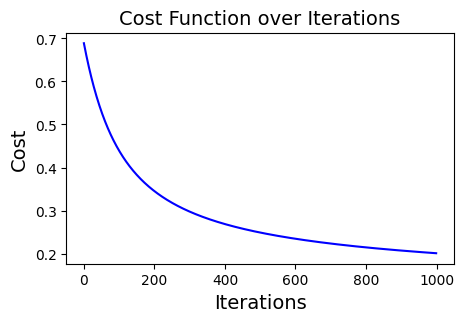

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        83
           1       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Accuracy: 0.97


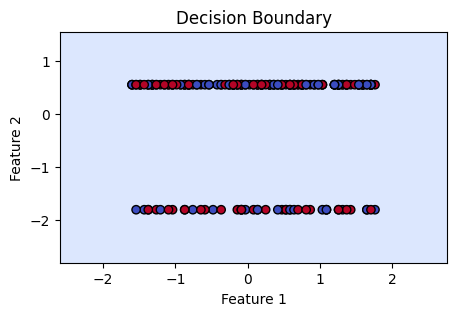

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Logistic function (sigmoid)
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Cost function for logistic regression
def cost_logreg_vec(X, y, w, b):
    z = np.matmul(X, w) + b
    y_dash = logistic(z)
    return -np.mean(y * np.log(y_dash) + (1 - y) * np.log(1 - y_dash))

# Compute gradients
def compute_gradients(X, y, w, b):
    m = len(y)
    z = np.matmul(X, w) + b
    y_dash = logistic(z)

    dw = np.dot(X.T, (y_dash - y)) / m
    db = np.sum(y_dash - y) / m

    return dw, db

# Gradient Descent
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        dw, db = compute_gradients(X, y, w, b)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute cost after updating
        cost = cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

# Logistic Regression Training
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights as zero
    b = 0            # Initialize bias as zero

    w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, iterations)

    return w, b, cost_history

# Load dataset
file_path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# Selecting all numerical features (excluding the target)
features = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
            'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']
target_col = 'target'

X = df[features].values
y = df[target_col].values

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
learning_rate = 0.01
iterations = 1000
w, b, cost_history = logistic_regression(X_train_scaled, y_train, learning_rate, iterations)

# Plot cost function history
plt.figure(figsize=(5, 3))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost Function over Iterations", fontsize=14)
plt.show()

# Function to predict probabilities
def predict(X, w, b):
    z = np.matmul(X, w) + b
    return logistic(z)

# Function to get final predictions (0 or 1)
def predict_class(X, w, b, threshold=0.5):
    return (predict(X, w, b) >= threshold).astype(int)

# Get predictions on the test set
y_pred = predict_class(X_test_scaled, w, b)

# Print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Select only 2 features for decision boundary plot
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train logistic regression on 2D data
w_2D, b_2D, _ = logistic_regression(X_train_2D, y_train, learning_rate, iterations)

# Function to plot decision boundary
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(5, 3))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_class(grid, w, b)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary using the fixed variables
plot_decision_boundary(X_test_2D, y_test, w_2D, b_2D)


## **Implementation of Logistic Regression with Library**

Accuracy: 0.96
Confusion Matrix:
 [[ 79   4]
 [  3 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



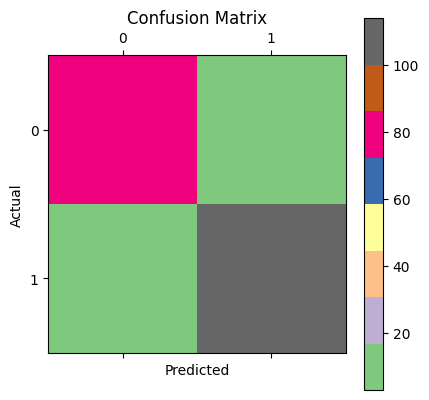

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# Selecting features and target column
target_col = 'target'  # This is the target column indicating presence of heart disease (1: Disease, 0: No Disease)
features = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
            'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']

# Extracting X and y
X = df[features]
y = df[target_col]

# Encode categorical variables if needed
encoder = LabelEncoder()
X.loc[:, 'gender'] = encoder.fit_transform(X['gender'])  # Encoding binary categorical feature 'gender'
X.loc[:, 'fastingbloodsugar'] = encoder.fit_transform(X['fastingbloodsugar'])  # Encoding 'fastingbloodsugar' as binary

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Plot confusion matrix
plt.matshow(conf_matrix, cmap='Accent')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Log loss**

The **log loss function** for logistic regression measures the difference between the true label (y) and the predicted probability (y') of a binary outcome. The formula is:

\[
L(y, y') = -y \log(y') - (1 - y) \log(1 - y')
\]


This log loss function penalizes incorrect predictions more heavily when they are more confident (i.e., close to 0 or 1).

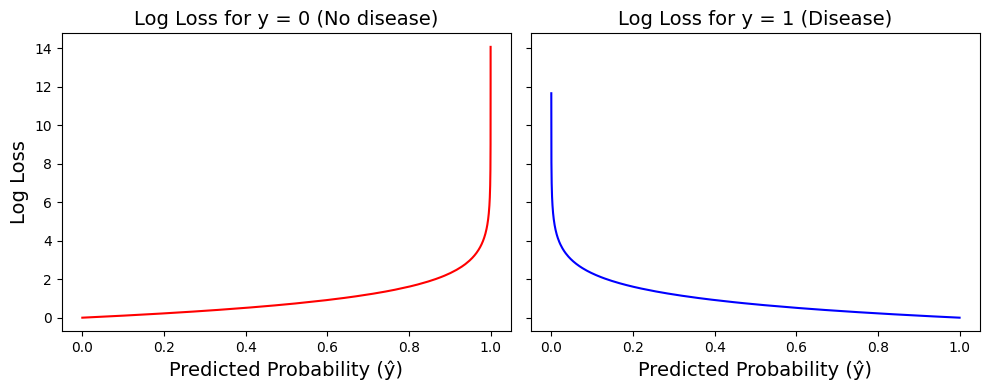

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load dataset
file_path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# Assuming 'target' column as the outcome variable (0 = No disease, 1 = Disease)
X = df.drop('target', axis=1)  # Features (excluding the target column)
y = df['target']  # Target variable (0 = No disease, 1 = Disease)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities (ŷ = sigmoid(Xw + b)) on the training data
y_pred_proba_train = model.predict_proba(X_train)[:, 1]  # Probabilities for class 1 (Disease)

# Log loss function for y = 0 and y = 1
def log_loss_plot(y_actual, y_pred):
    return - (y_actual * np.log(y_pred)) - ((1 - y_actual) * np.log(1 - y_pred))

# Plotting Log Loss for different probabilities in y_pred_proba_train
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot log loss for y = 0 (No disease)
ax[0].plot(np.sort(y_pred_proba_train), log_loss_plot(0, np.sort(y_pred_proba_train)), color='red')
ax[0].set_title("Log Loss for y = 0 (No disease)", fontsize=14)
ax[0].set_xlabel("Predicted Probability (ŷ)", fontsize=14)
ax[0].set_ylabel("Log Loss", fontsize=14)

# Plot log loss for y = 1 (Disease)
ax[1].plot(np.sort(y_pred_proba_train), log_loss_plot(1, np.sort(y_pred_proba_train)), color='blue')
ax[1].set_title("Log Loss for y = 1 (Disease)", fontsize=14)
ax[1].set_xlabel("Predicted Probability (ŷ)", fontsize=14)

plt.tight_layout()
plt.show()


##**Cross Entropy**

Cross-entropy is a measure of the difference between two probability distributions. In machine learning, it is often used as a loss function for classification problems, especially when working with probabilistic models. It quantifies how far off the predicted probability distribution is from the actual distribution.

Loss=−[y⋅log(p)+(1−y)⋅log(1−p)]  (binary)

In [ ]:
# Binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    # Clip predictions to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

# Predict probabilities (sigmoid output) calculated above for breast cancer datset
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute binary cross-entropy loss
loss = binary_cross_entropy(y_test, y_pred_proba)
print(f'Binary Cross-Entropy Loss: {loss:.4f}')

Binary Cross-Entropy Loss: 0.0862


## **Activation Functions**

### Sigmoid Function

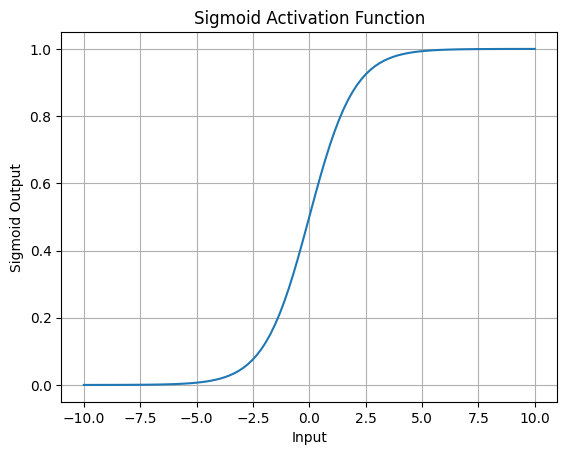

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def plot_sigmoid():
    x = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10
    y = sigmoid(x)

    # Plotting the sigmoid curve
    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.show()

plot_sigmoid()


### TANH Function

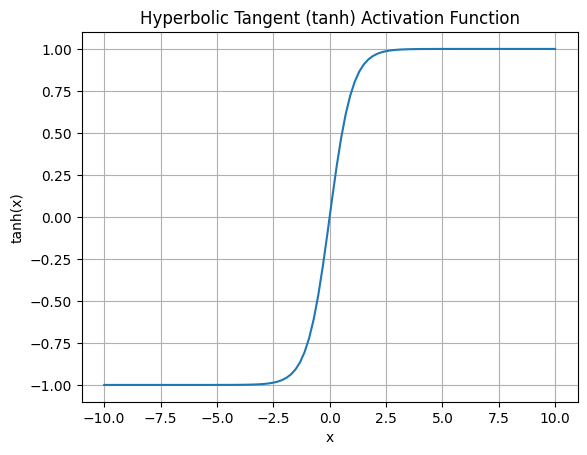

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

def plot_tanh():

    x = np.linspace(-10, 10, 100)

    tanh = np.tanh(x)

    plt.plot(x, tanh)
    plt.title("Hyperbolic Tangent (tanh) Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.show()

plot_tanh()

### ReLU Functiuon

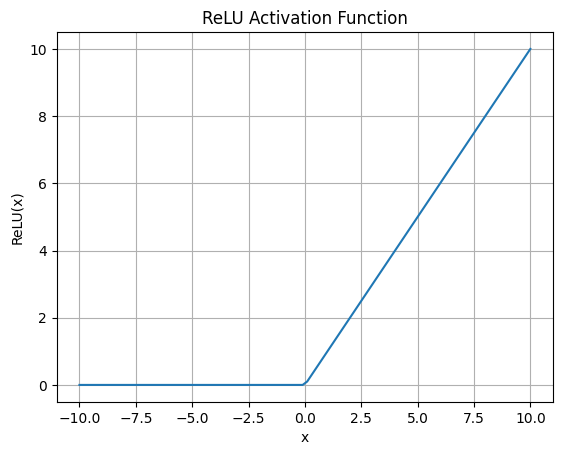

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return max(0,x)

def plot_relu():

    x = np.linspace(-10, 10, 100)

    relu = np.maximum(0, x)

    plt.plot(x, relu)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()
plot_relu()

## **Sklearn Implementation of MultiLayer Perceptron(MLP)**

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.84      0.71        83
           1       0.85      0.62      0.71       117

    accuracy                           0.71       200
   macro avg       0.73      0.73      0.71       200
weighted avg       0.75      0.71      0.71       200



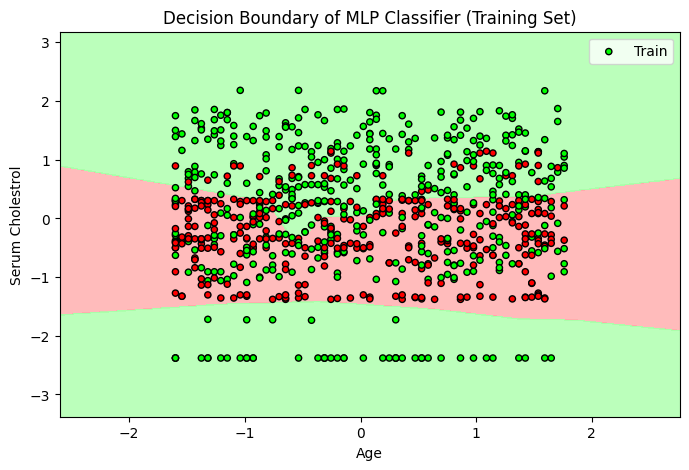

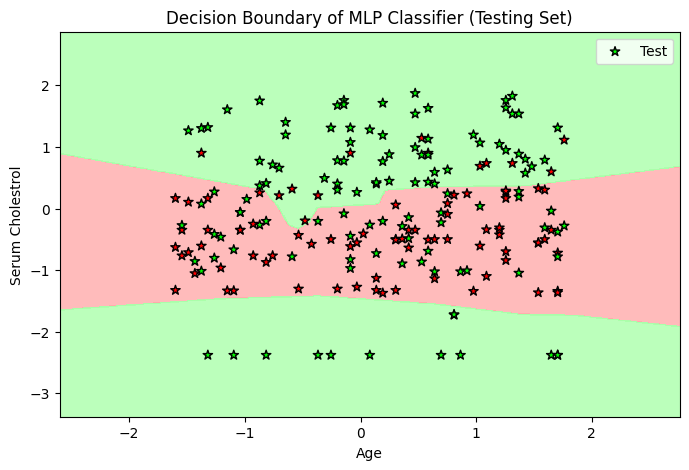

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

X = df[['age', 'serumcholestrol']].values  # Use 'age' and 'serumcholestrol' as features
y = df['target'].values  # Target variable (0 = No disease, 1 = Disease)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the MLP classifier on 'age' and 'serumcholestrol'
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundaries for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Age")
plt.ylabel("Serum Cholestrol")
plt.legend()
plt.show()

# Plot decision boundaries for testing set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Age")
plt.ylabel("Serum Cholestrol")
plt.legend()
plt.show()


## **Keras Implementation of MultiLayer Perceptron(MLP)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Load the dataset
file_path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# Step 2: Prepare the dataset
X = df[['age', 'serumcholestrol']].values  # Use 'age' and 'serumcholestrol' as features
y = df['target'].values  # Target variable (0 = No disease, 1 = Disease)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (helps with convergence and performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler

# Step 3: Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 8: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4341 - loss: 0.7201 - val_accuracy: 0.4875 - val_loss: 0.6991
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5765 - loss: 0.6904 - val_accuracy: 0.5813 - val_loss: 0.6809
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5991 - loss: 0.6660 - val_accuracy: 0.5625 - val_loss: 0.6728
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6221 - loss: 0.6498 - val_accuracy: 0.5750 - val_loss: 0.6663
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6118 - loss: 0.6407 - val_accuracy: 0.5938 - val_loss: 0.6624
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6100 - loss: 0.6305 - val_accuracy: 0.5875 - val_loss: 0.6602
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6159 - loss: 0.6175 - val_accuracy: 0.6062 - val_loss: 0.6587
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6321 - loss: 0.5967 - val_accuracy: 0.5938 - val_loss: 0.6579
Ep

## **Implementation of Backpropagation from Scratch**

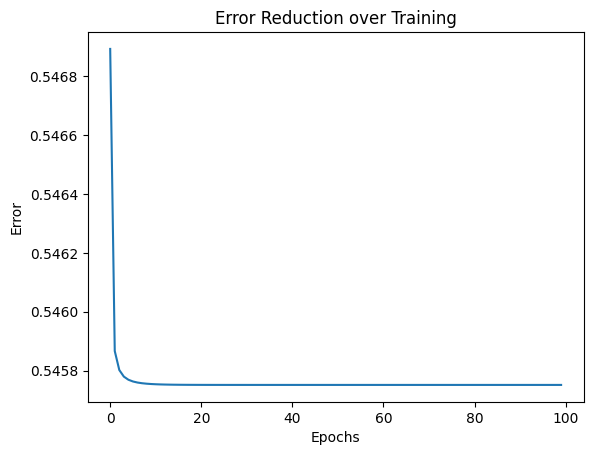

Weights w1: [0.15, 0.2, 0.25, 0.3]
Weights w2: [0.2831677714067138, 0.3331677714067137, 1.7900270451338864, 1.8400270451338872]


In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Function to compute activation
def activation(bias, wa, xa, wb, xb):
    summation = bias + wa * xa + wb * xb
    return sigmoid(summation)

# Function to create layers
def form_layers(bias, weights, xa, xb, layer, index):
    if index == 4:
        return
    var = activation(bias, weights[index], xa, weights[index + 1], xb)
    layer.append(var)
    form_layers(bias, weights, xa, xb, layer, index + 2)

# Feed Forward Function
def feed_forward(b1, b2, w1, w2, x, hidden, output):
    for i in range(2):
        if i == 0:  # First layer
            form_layers(b1, w1, x[0], x[1], hidden, 0)
        else:  # Second layer
            form_layers(b2, w2, hidden[0], hidden[1], output, 0)

# Error Calculation
def find_error(output, desired):
    return 0.5 * sum((output[i] - desired[i]) ** 2 for i in range(len(output)))

# Backpropagation Function
def back_propagate(w1, w2, hidden, output, desired, alpha, x):
    e_total_by_net_o1 = -(desired[0] - output[0]) * (output[0] * (1 - output[0]))
    e_total_by_net_o2 = -(desired[1] - output[1]) * (output[1] * (1 - output[1]))
    differentiated = [e_total_by_net_o1, e_total_by_net_o2]

    # Update Layer 1 Weights
    for i in range(len(w1)):
        temp = (differentiated[0] * w2[math.floor(i / 2)] + differentiated[1] * w2[math.floor(i / 2) + 2])
        temp *= hidden[math.floor(i / 2)] * (1 - hidden[math.floor(i / 2)])
        temp *= x[i % 2]
        w1[i] -= alpha * temp

    # Update Layer 2 Weights
    for i in range(len(w2)):
        temp = differentiated[math.floor(i / 2)] * hidden[i % 2]
        w2[i] -= alpha * temp

# Load CSV Data
df = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")

x_values = df.iloc[:, :2].values  # First 2 columns as inputs
desired_values = df.iloc[:, 2:4].values  # Next 2 columns as expected outputs

# Initialize weights and biases
w1 = [0.15, 0.20, 0.25, 0.30]
w2 = [0.40, 0.45, 0.50, 0.55]
b1 = 0.35
b2 = 0.60
epochs = 100
alpha = 0.5
error_list = []

# Training Loop
for _ in range(epochs):
    total_error = 0
    for i in range(len(x_values)):
        x = x_values[i]
        desired = desired_values[i]

        hidden = []
        output = []
        feed_forward(b1, b2, w1, w2, x, hidden, output)
        total_error += find_error(output, desired)
        back_propagate(w1, w2, hidden, output, desired, alpha, x)

    error_list.append(total_error / len(x_values))

# Plotting error over epochs
plt.plot(error_list)

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction over Training")
plt.show()

print("Weights w1:", w1)
print("Weights w2:", w2)


In [ ]:
print(error_list)

[0.5468926935992049, 0.5458664999212941, 0.5458019939371026, 0.5457796407684926, 0.5457690172660886, 0.5457631167011996, 0.5457595179737383, 0.545757183558294, 0.5457556030269786, 0.545754499553178, 0.545753711642455, 0.5457531396041819, 0.5457527190873179, 0.5457524070452524, 0.5457521738499904, 0.54575199864013, 0.5457518664591398, 0.545751766429807, 0.5457516905524054, 0.5457516328916612, 0.5457515890138313, 0.5457515555892684, 0.5457515301072245, 0.5457515106684673, 0.5457514958328478, 0.5457514845062921, 0.5457514758564405, 0.5457514692493557, 0.5457514642018099, 0.5457514603452194, 0.5457514573983052, 0.5457514551463392, 0.5457514534253428, 0.5457514521100684, 0.5457514511048369, 0.5457514503365439, 0.5457514497493317, 0.5457514493005128, 0.5457514489574695, 0.5457514486952689, 0.5457514484948599, 0.5457514483416781, 0.5457514482245945, 0.5457514481351013, 0.5457514480666986, 0.5457514480144146, 0.5457514479744506, 0.5457514479439051, 0.5457514479205569, 0.5457514479027099, 0.545

In [ ]:
print(output)

[0.7638182765301672, 0.9858502325377992]
